<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/1_%ED%99%95%EB%A5%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import binom

📌 베르누이 분포

    1. 이항검정
       scipy.stats.binom_test()
       귀무가설 : 데이터가 p의 베르누이 분포를 따른다.
    2. 카이제곱 적합도 검정
       scipy.stat.chisqure()


BinomTestResult(k=71, n=100, alternative='two-sided', statistic=0.71, pvalue=0.9132161352465717)


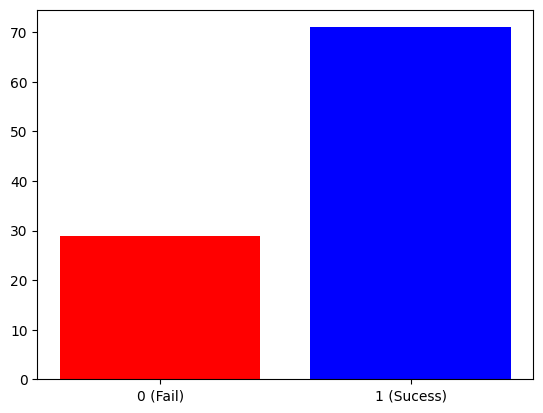

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import binomtest

p = 0.7
size = 100
data = bernoulli.rvs(p, size = size)

plt.bar([0, 1], [sum(data == 0), sum(data == 1)], tick_label=['0 (Fail)', '1 (Sucess)'], color=['red', 'blue'])


# 검정하기 - binom_test
# 귀무가설 : 데이터가 베르누이 분포를 따른다.
# 대립가설 : 데이터가 베르누이 분포를 따른다.

success_count = sum(data)
n = len(data)
p = 0.7

p_val = binomtest(success_count, n, p, alternative = 'two-sided')
print(p_val)

In [ ]:
n = 3
p = 0.99
p_fail = 1 - p

# 적어도 하나 이상의 신호탄이 정상적으로 작동할 확률
print(1 - rv.cdf(0))

# 신호탄이 정확히 2개만 정상 작동할 확률
rv = binom(n,p)
rv.pmf(2)

0.999999


0.029403000000000026

2.12 어느 운전학원을 이수한 사람이 각 시험에서 운전 면허를 취득할 확률이 0.8, 각각의 시험이 독립일때

In [ ]:
p = 0.8

# 1) 두번의 시험 안에 운전면허를 취득할 확률
rv = binom(2, 0.8)
p = 1 - rv.cdf(0)
print(p)

# 2) 세번의 시험 후에도 운전 면허를 취득하지 못할 확률 = 세번 중 0번 성공
rv = binom(3, 0.8)
print(rv.cdf(0))

0.96
0.007999999999999995


📌 이항 분포

In [ ]:
from scipy.stats import binom

# ✅ 변수 설정
n = 5   # 시행 횟수 (예: 동전을 5번 던짐)
p = 0.5  # 성공 확률 (예: 동전 앞면이 나올 확률)
k = 3    # 성공 횟수 (예: 앞면이 3번 나올 확률)

# ✅ 정확히 k번 성공할 확률 (PMF)
p_exact = binom.pmf(k, n, p)

# ✅ k번 이하 성공할 확률 (CDF)
p_cumulative = binom.cdf(k, n, p)

# ✅ 결과 출력
print(f"P(X = {k}) = {p_exact:.4f} (정확히 {k}번 성공)")
print(f"P(X ≤ {k}) = {p_cumulative:.4f} ({k}번 이하 성공할 확률)")

In [ ]:
# KS 검정 : 전체 분포가 이항 분포를 따르는지 검정
from scipy.stats import binom, kstest

# ✅ 이항 분포에서 샘플 데이터 생성
sample_data = binom.rvs(100, 0.3, size=1000)

# ✅ KS 검정 수행
ks_stat, p_value = kstest(sample_data, binom.cdf, args=(100, 0.3))

# ✅ 결과 출력
print(f"KS 검정 p-value: {p_value:.4f}")
if p_value < 0.05:
    print("❌ 귀무가설 기각 → 데이터가 이항 분포를 따르지 않음")
else:
    print("✅ 귀무가설 채택 → 데이터가 이항 분포를 따를 가능성이 높음")

KS 검정 p-value: 0.0005
❌ 귀무가설 기각 → 데이터가 이항 분포를 따르지 않음


예제 3) 멘델의 법칙에 의하면 빨간색과 흰색이 섞여 있는 꽃나무를 자가수정시켜 얻은 꽃나무의 25%는 빨간 꽃을 피우게 된다고 한다. 만약 5그루의 혼합 색의 꽃나무를 자가수정시켜 5그루의 꽃나무를 얻었 을 때 다음의 확률을 구하라. </br>
 (1) 빨간색 꽃나무가 하나도 없다. </br>
 (2) 빨간색 꽃나무가 4개 이상이다 </br>

In [ ]:
p = 0.25
n = 5

rv = binom(n, p)

# 1) P(X = 0)
print(rv.cdf(0))

# 2) P(X >= 4)
print(1 - rv.cdf(3))

0.23730468750000006
0.015625


❓ 예제 4) 어떤 병이 새로운 치료 방법으로 치유될 확률이 50%인데 15명의 환자에게 치료법을 적용

In [ ]:
p = 0.5
n = 15

rv = binom(n,p)
# 1) 6명 이하가 치유 P(X =< 6)
print(rv.cdf(6))

# 2) 6명 이상, 10명 이하
print(rv.pmf(6) + rv.pmf(7) + rv.pmf(8) + rv.pmf(9) + rv.pmf(10))
print(rv.cdf(10) - rv.cdf(5))

# 3) 12명 이상이 치료 P(X >= 12)
print(1 - rv.cdf(11))

0.30361938476562494
0.7898864746093752
0.789886474609375
0.017578125



❓ 미국의 백인 중 85%가 Rh十의 혈액형을 가지고 있다고 한다. 이 중에서 7명을 임의로 선택하였을 때 다음의 확률을 구하라.

In [ ]:
p = 0.85
p_negative = 1 - p
n = 7
rv = binom(n, p)

#(1) 적어도 5명이 Rh +의 혈액형을 가지고 있다. > 5명 이상 P(X >= 5)
print(1 - rv.cdf(4))

# (2) 많아야 3명이 Rh—(Rh+가 없는 것)의 혈액형을 가지고 있다.
print(binom.cdf(3, n, p_negative))


0.92623483984375
0.987896828125


❓정팔면체 주사위에 1~8까지 숫자가 적혀있다. 8번 주사위를 던졌을 때 다음의 확률을 구하여라

In [ ]:
p = 1/8
n = 8
rv = binom(n, p)
#(1) 숫자 1이 한 번만 나오는 경우
print(rv.pmf(1))

#(2) 숫자 2 또는 4가 5회 이상 나오는 경우 : P(X >= 5)
print(1 - rv.cdf(4))

#(3) 숫자 3이 적어도 3회 나오는 경우 = P(X >=3) 3이상
print(1 - rv.cdf(2))

# (4) 숫자 5가 많아야 3회 나오는 경우 = 3회 이하
print(rv.cdf(3))

0.3926959037780762
0.0012300610542297363
0.06734722852706909
0.9887521862983704


❓ 조사결과 70%의 성인 여성이 2년동안 적어도 1번 내과를 찾는다고 할떄, 19명의 성인 여성이 임의로 추출되었다.

In [ ]:
p = 0.7
n = 19
rv = binom(n,p)
# 1) 14명 미만이 내과를 찾을 확률
print(rv.cdf(13))
# 2) 적어도 17명이 내과를 찾을 확률
print(1 - rv.cdf(16))

0.526137475726486
0.04622368312925795


❓ 20%의 3학년 학생이 장학금을 받는다. 20명의 3학년 학생을 선택하였을 때, 많아야 3명이 장학금을 받을 확률

In [ ]:
p = 0.2
n = 20

rv = binom(n, p)

# 많아야 3명 (3명 이하)
print(rv.cdf(3))

# 선택된 20명 중 장학금을 받을 사람의 기대 인원 수
print(n * p)

# 기대 인원수와 같은 수의 사람이 장학금을 받을 확률
print(rv.pmf(4))

0.41144886195656893
4.0
0.2181994019461005


❓ 어떤 암에 대해서, 초기 상태에서 발견될 경우 5년 후 생존율이 80%이다. 18명의 암 초기 환자가 있다고 할때, 5년 후 생존자를 조사하였다.

In [ ]:
p = 0.8
n = 18
rv = binom(n,p)
# (1) 14명의 환자가 살아있다.
print(rv.cdf(14))

# (2) 6명이 5년 이내 죽는다.
print(binom.pmf(6, n, 1-p))

# (3) 9명 이상, 13명 이하의 사람이 살아남았다.
print(rv.cdf(13) - rv.cdf(8) )

0.49897454145503223
0.08164533543213465
0.28273529191399416


❓  유전법칙에 따르면 완두콩의 우성교배를 통한 자손은 네 가지 형태이고 각각의 비율이 둥글고 노 란 것, 쭈그러지고 노란 것. 둥글고 녹색인 것, 쭈그러지고 녹색인 것이 9 : 3 : 3 : 1이라고 한다. 확률변수 X를 130개의 우성교배 자손에서 둥글고 노란 것의 개수라고 할 때, X의 평균과 표준편차를 구하라.

In [ ]:
total = 9 + 3 + 3 + 1
round_yellow = 9

p = round_yellow / total

rv = binom(130, p)

print(f"평균 : {rv.mean()}")
print(f"표준편차 : {rv.std()}")

평균 : 73.125
표준편차 : 5.656163673374383


❓ 길동이는 자신이 초능력을 가지고 있다고 주장하고 있다. 이 주장을 확인하기 위해 5가지의 다른 그림이 그려진 카드를 준비하고 길동이의 눈을 가리고 5장의 카드 중 하나를 선택한 다음 5가지의 카드 중 어느 카드가 선택되었는지에 대해 물어보는 작업을 16회 실시하였다. 사실은 길동이는 초능력이 없고, 임의로 대답하였다고 하자.

In [ ]:
n = 16
p = 1/5

rv = binom(n,p)

#(1) 카드가 무엇인지 맞추는 횟수가 3회 이하일 확률은 얼마인가? P(X < 3)
print(rv.cdf(3))

#(2) 카드가 무엇인지를 못 맞추는 횟수가 10회 이상일 확률은 얼마인가? = 6번의 성공
print(rv.pmf(6))

0.5981343255101437
0.05503055697018879


📌 기하 분포
  - 처음으로 성공하기까지 실패한 횟수를 나타내는 확률 분포

✅ 기하 분포 검정 방법
    
    1) scipy.stat.chisquare() - 카이 제곱 적합도 검정
       - 관측된 데이터와 기하분포의 기대값이 유사한지 검정

    2) scipy.stat.kstest() - 전체 데이터가 기하분포의 누적분포(CDF)를 따르는지 확인
    

In [ ]:
import numpy as np
from scipy.stats import geom, chisquare, kstest

p = 0.3
sample_size = 100
sample_data = geom.rvs(p, size=sample_size)


# 1) 카이제곱
# 기대빈도 계산
unique, counts = np.unique(sample_data, return_counts=True)

expected_counts = geom.pmf(unique, p) * sample_size
expected_counts *= sum(counts) / sum(expected_counts)

# ✅ 카이제곱 검정 수행
chi_stat, chi_p_value = chisquare(counts, f_exp=expected_counts)
print(chi_p_value)


# 2) ks test
ks_stat, p_val = kstest(sample_data, geom.cdf, args = (p,))

0.3869024815086478


❓ 새로운 제품을 출시하고, 각 고객 방문시 제품 구매 확률이 0.1 일때,

In [ ]:
rv = geom(0.1)
# 1) 최소한명의 고객이 제품을 구매하기 까지 방문하는 고객수가 4명일 확률
print(rv.pmf(4))

# 2) 최소 한명의 고객이 제품을 구매하기 까지 방문하는 고객 수가 5명 이하일 확률
print(rv.cdf(5))


0.0729
0.40951000000000004


❓ 어떤 제품이 불량일 확률이 5%이다. 이 제품을 무작위로 검사할 때, 처음으로 불량품이 나올 때까지 검사한 횟수가 기하분포를 따른다고 할 때, 3번째 검사에서 처음으로 불량이 나올 확률은?

In [ ]:
rv = geom(0.05)
print(rv.pmf(3))

0.045125


📌 초기하 분포
    - 비복원 추출을 할때, 특정 성공 횟수의 확률을 계산

    hypergeom.cdf(k, M, n, N)

In [ ]:
from scipy.stats import hypergeom
# 감기  양성  음성
# 남자   16    54
# 여자   12    23

# (1) 다섯명의 사람을 임의로 선택했을때, 감기에 양성인 사람이 1명일 확률
total = 16 + 54 + 12 + 23
positive = 16 + 12
n = 5
k = 1

rv = hypergeom(total, positive, n)
print(rv.pmf(k))

# (2) 12명의 임의로 선택할때, 감기에 양성 반응인 사람이 6명 이상일 확률
n = 12
k = 6
rv = hypergeom(total, positive, n)
print(1- rv.cdf(k -1))

# (3) 4명의 남자, 2명의 여자가 임의로 선택되었을때, 감기에 양성 반응이 없을 확률
male_total = 16 + 54  #남자 전체
postive_male = 16     #남자 양성 전체
m = 4

female_total = 12 + 23
postive_female = 12
f = 2

m_rv = hypergeom(male_total, postive_male, m)
p_male = m_rv.pmf(0)

f_rv = hypergeom(female_total, postive_female, f)
p_female = f_rv.pmf(0)

male_female_negative = p_male * p_female
print(male_female_negative)


0.392413489031546
0.060189420295487905
0.14666141083298995


❓48대의 새 차 중 12대에 불량 오디오가 설치, 어느 영업소가 8대를 인수 했을때, 오디오가 불량인 차가 적어도 1대인 확률

In [ ]:
total = 48
s = 12
n = 8

rv = hypergeom(total, s, n)
# P(X >= 1)
print(1 - rv.cdf(0))

0.9198080808981831


❓어느 회사에서 사원을 8명 모집하기 위해 광고를 냈는데, 15명 남자, 8명 여자가 지원 임의로 8명을 선택한다면, 8명 중 여자가 3명 이상일 확률

In [ ]:
total = 15 + 8
S = 8   #여자 지원자 수
n = 8   #선택된 사원수

rv = hypergeom(total, S, n)

# P(X ≥ 3) = 1 - P(X ≤ 2)
print(1 - rv.cdf(2))

0.59606497061067


어느 대학에서 전체 50명의 교수 중에서 5명을 뽑아 위원회를 구성한다. 통계학과에 6명의 교수가 있다고 하자.

In [ ]:
total = 50
S = 6 #통계학과 교수
n = 5

# 1) 통계학과 교수가 1명도 없을 경우
rv = hypergeom(total, S, n)
print(rv.pmf(0))

# 2) 적어도 1명 이상의 통계학과 교수가 있을 확률
print(1 - rv.cdf(0))

0.5125677282939077
0.48743227170609227
